# Curate a Dataset


In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

**Note:** The data in `reviews.txt` we're using has already been preprocessed a bit and contains only lower case characters. If we were working from raw data, where we didn't know it was all lower case, we would want to add a step here to convert it. That's so we treat different variations of the same word, like `The`, `the`, and `THE`, all the same way.

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Quick Theory Validation

In [10]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [11]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [58]:
# Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for l, r in zip(labels, reviews):
    if l == 'POSITIVE':
        for words in r.split(" "):
            positive_counts[words] += 1
            total_counts[words] += 1
    else:
        for words in r.split(" "):
            negative_counts[words] += 1
            total_counts[words] += 1

In [59]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 2201872),
 ('the', 693296),
 ('.', 638616),
 ('and', 358888),
 ('a', 334752),
 ('of', 307420),
 ('to', 266984),
 ('is', 228980),
 ('in', 200860),
 ('br', 196940),
 ('it', 192100),
 ('i', 162972),
 ('that', 142520),
 ('this', 140320),
 ('s', 135260),
 ('as', 105232),
 ('with', 92988),
 ('for', 89664),
 ('was', 87668),
 ('film', 83748),
 ('but', 83288),
 ('movie', 76296),
 ('his', 68908),
 ('on', 68032),
 ('you', 66724),
 ('he', 65128),
 ('are', 59228),
 ('not', 57088),
 ('t', 54880),
 ('one', 54620),
 ('have', 50348),
 ('be', 49664),
 ('by', 47988),
 ('all', 47768),
 ('who', 45856),
 ('an', 45176),
 ('at', 44936),
 ('from', 43068),
 ('her', 41896),
 ('they', 39580),
 ('has', 36744),
 ('so', 36616),
 ('like', 36152),
 ('about', 33252),
 ('very', 33220),
 ('out', 32536),
 ('there', 32228),
 ('she', 31116),
 ('what', 30948),
 ('or', 30928),
 ('good', 30880),
 ('more', 30084),
 ('when', 29824),
 ('some', 29764),
 ('if', 29140),
 ('just', 28608),
 ('can', 28004),
 ('story', 27120),
 ('

In [18]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 1684386),
 ('.', 502614),
 ('the', 490167),
 ('a', 237963),
 ('and', 223155),
 ('of', 207027),
 ('to', 206922),
 ('br', 157911),
 ('is', 150249),
 ('it', 144981),
 ('i', 140640),
 ('in', 131259),
 ('this', 122760),
 ('that', 112845),
 ('s', 94638),
 ('was', 78873),
 ('movie', 74895),
 ('for', 65781),
 ('but', 65343),
 ('with', 62634),
 ('as', 61875),
 ('t', 61083),
 ('film', 57654),
 ('you', 52647),
 ('on', 51576),
 ('not', 49062),
 ('have', 45432),
 ('are', 43869),
 ('be', 43623),
 ('he', 41568),
 ('one', 39402),
 ('they', 39033),
 ('at', 36837),
 ('his', 36441),
 ('all', 36108),
 ('so', 34389),
 ('like', 33714),
 ('there', 32325),
 ('just', 31857),
 ('by', 31647),
 ('or', 30816),
 ('an', 30798),
 ('who', 29907),
 ('from', 29193),
 ('if', 28554),
 ('about', 27183),
 ('out', 26937),
 ('what', 25266),
 ('some', 24918),
 ('no', 24429),
 ('her', 23841),
 ('even', 23061),
 ('can', 22959),
 ('has', 22812),
 ('good', 22269),
 ('bad', 22203),
 ('would', 21108),
 ('up', 20910),
 ('only',

As we can see, **common words like "the" appear very often in both positive and negative reviews**. Instead of finding the most common words in positive or negative reviews, what we really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.


In [62]:
# Create Counter object to store positive/negative ratios
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
#       Consider words to be "common" if they've been used at least 100 times
        
for word, cnt in list(total_counts.most_common()):
    if cnt > 100: # change this value from 10, 50 , 100 to observe the changes in 
        pos_neg_ratio = positive_counts[word] / float(negative_counts[word]+1)
        pos_neg_ratios[word] = pos_neg_ratio

Examine the ratios for a few words:

In [63]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.060804183873786
Pos-to-neg ratio for 'amazing' = 4.0343183984747375
Pos-to-neg ratio for 'terrible' = 0.1775381850853549


Looking closely at the values you just calculated, we see the following:

* Words that we would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that we would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because we would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested we add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.



In the end, extremely positive and extremely negative words will have positive-to-negative ratios with similar magnitudes but opposite signs.

In [64]:
# Convert ratios to logs
for word,ratio in pos_neg_ratios.most_common():
    if ratio > 1:
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))


Examine the new ratios:

In [65]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902728451576505
Pos-to-neg ratio for 'amazing' = 1.394837365141838
Pos-to-neg ratio for 'terrible' = -1.6737728005177297


If everything worked, now we should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

Now run the following cells to see more ratios. 

The first cell displays all the words, ordered by how associated they are with postive reviews. 

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. 


In [66]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 6.077642243349034),
 ('antwone', 5.863631175598097),
 ('din', 5.793013608384144),
 ('gunga', 5.575949103146316),
 ('goldsworthy', 5.560681631015528),
 ('gypo', 5.480638923341991),
 ('yokai', 5.480638923341991),
 ('visconti', 5.318119993844216),
 ('flavia', 5.318119993844216),
 ('blandings', 5.2574953720277815),
 ('kells', 5.2574953720277815),
 ('brashear', 5.236441962829949),
 ('gino', 5.214935757608986),
 ('deathtrap', 5.19295685089021),
 ('harilal', 5.099866427824199),
 ('panahi', 5.099866427824199),
 ('ossessione', 5.049856007249537),
 ('tsui', 5.0238805208462765),
 ('caruso', 5.0238805208462765),
 ('sabu', 4.997212273764115),
 ('ahmad', 4.997212273764115),
 ('khouri', 4.969813299576001),
 ('dominick', 4.969813299576001),
 ('aweigh', 4.941642422609304),
 ('mj', 4.941642422609304),
 ('mcintire', 4.912654885736052),
 ('kriemhild', 4.912654885736052),
 ('blackie', 4.882801922586371),
 ('daisies', 4.882801922586371),
 ('newcombe', 4.882801922586371),
 ('kei', 4.852030263919617

In [57]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]


[('schwartzman', -4.605170185988092),
 ('nastassja', -4.605170185988092),
 ('nisha', -4.605170185988092),
 ('babban', -4.605170185988092),
 ('lorenz', -4.605170185988092),
 ('gymkata', -4.605170185988092),
 ('bilko', -4.605170185988092),
 ('sleepaway', -4.605170185988092),
 ('adv', -4.605170185988092),
 ('kharis', -4.605170185988092),
 ('completists', -4.605170185988092),
 ('sibrel', -4.605170185988092),
 ('unisol', -4.605170185988092),
 ('carnosaur', -4.605170185988092),
 ('ramtha', -4.605170185988092),
 ('hee', -4.605170185988092),
 ('gruner', -4.605170185988092),
 ('reb', -4.605170185988092),
 ('flemming', -4.605170185988092),
 ('gammera', -4.605170185988092),
 ('raquel', -4.605170185988092),
 ('bla', -4.605170185988092),
 ('coffy', -4.605170185988092),
 ('sookie', -4.605170185988092),
 ('fitz', -4.605170185988092),
 ('dinocroc', -4.605170185988092),
 ('leaden', -4.605170185988092),
 ('morvern', -4.605170185988092),
 ('richie', -4.605170185988092),
 ('stirba', -4.605170185988092)]

In [67]:
pos_neg_ratios.most_common()[:-31:-1] # print last 30 words, this produce same result as above

[('rosanna', -4.605170185988092),
 ('berkowitz', -4.605170185988092),
 ('orca', -4.605170185988092),
 ('mraovich', -4.605170185988092),
 ('kibbutz', -4.605170185988092),
 ('dunaway', -4.605170185988092),
 ('savini', -4.605170185988092),
 ('lordi', -4.605170185988092),
 ('hackenstein', -4.605170185988092),
 ('manos', -4.605170185988092),
 ('zenia', -4.605170185988092),
 ('shaq', -4.605170185988092),
 ('tremors', -4.605170185988092),
 ('darkman', -4.605170185988092),
 ('btk', -4.605170185988092),
 ('saif', -4.605170185988092),
 ('delia', -4.605170185988092),
 ('sarne', -4.605170185988092),
 ('gram', -4.605170185988092),
 ('kornbluth', -4.605170185988092),
 ('kareena', -4.605170185988092),
 ('hobgoblins', -4.605170185988092),
 ('tashan', -4.605170185988092),
 ('slater', -4.605170185988092),
 ('boll', -4.075671820516826),
 ('uwe', -3.918214975676067),
 ('thunderbirds', -3.637178079737046),
 ('beowulf', -3.6269376625580763),
 ('dahmer', -3.5480974157613048),
 ('wayans', -3.5098801595119595)

# Transforming Text into Numbers

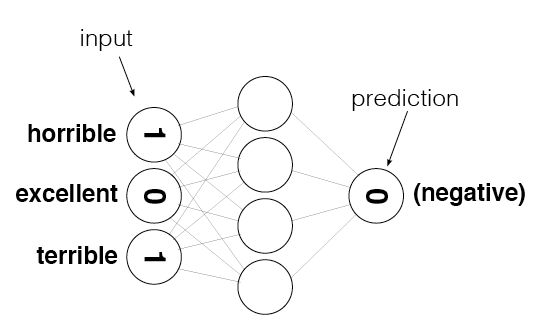

In [68]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

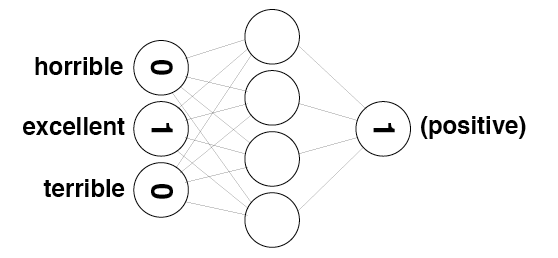

In [69]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Creating the Input/Output Data


In [72]:
# Create set named "vocab" containing all of the words from all of the reviews  
vocab = set()
for words in reviews:
    for word in words.split(" "):
        vocab.add(word)
    

Run the following cell to check your vocabulary size. If everything worked correctly, it should print **74074**

In [73]:
vocab_size = len(vocab)
print(vocab_size)

74074


Take a look at the following image. It represents the layers of the neural network we will be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

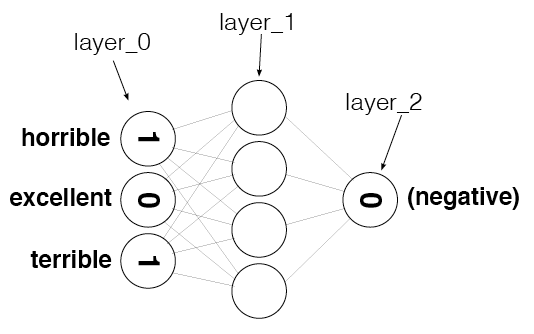

In [1]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

In [74]:
#Create layer_0 matrix with dimensions 1 by vocab_size, initially filled with zeros
import numpy as np
layer_0 = np.zeros((1, vocab_size))

Run the following cell. It should display `(1, 74074)`

In [75]:
layer_0.shape

(1, 74074)

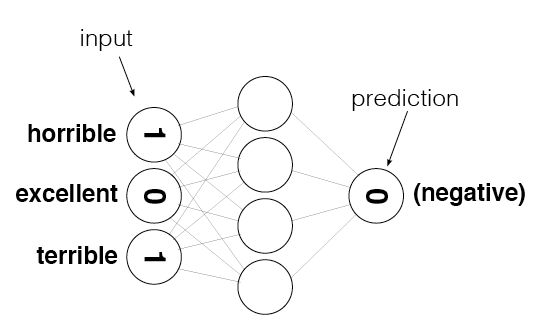

In [76]:
from IPython.display import Image
Image(filename='sentiment_network.png')

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [78]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'palin': 1,
 'combos': 2,
 'waqt': 3,
 'eally': 4,
 'decreased': 5,
 'symbolize': 6,
 'imaged': 7,
 'octaves': 8,
 'explains': 9,
 'chawla': 10,
 'pertinent': 11,
 'aston': 12,
 'positive': 13,
 'snot': 14,
 'mammaries': 15,
 'suprises': 16,
 'telepathically': 17,
 'honk': 18,
 'kit': 19,
 'stalkings': 20,
 'peculiar': 21,
 'unwise': 22,
 'budgeters': 23,
 'sunnydale': 24,
 'invokes': 25,
 'smother': 26,
 'norliss': 27,
 'disgusted': 28,
 'headlong': 29,
 'khans': 30,
 'miyazaki': 31,
 'captivates': 32,
 'photon': 33,
 'misreading': 34,
 'thresholds': 35,
 'mysteriosity': 36,
 'guerrilla': 37,
 'wisconsin': 38,
 'brozzie': 39,
 'clowns': 40,
 'wrinkles': 41,
 'jerkiness': 42,
 'virginity': 43,
 'unserious': 44,
 'unbiased': 45,
 'unencumbered': 46,
 'oldtimer': 47,
 'dragging': 48,
 'chapelle': 49,
 'priests': 50,
 'crotchy': 51,
 'deputized': 52,
 'quotations': 53,
 'ripper': 54,
 'shooters': 55,
 'occhipinti': 56,
 'tchin': 57,
 'suburbia': 58,
 'struggled': 59,
 'caterers':

**Implementation:**  This function should count how many times each word is used in the given review, and then store those counts at the appropriate indices inside `layer_0`.
         

**Note:** layer_0 is a 1x74074 matrix, our job is to mark the column of each word. <br>
So layer_0[0][word2index[word]] will locate a particular col in the matrix

In [81]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    # clear out previous state by resetting the layer to be all 0s
    layer_0 *= 0
    
    # count how many times each word is used in the given review and store the results in layer_0 
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

Run the following cell to test updating the input layer with the first review. The indices assigned may not be the same as in the solution, but hopefully you'll see some non-zero values in `layer_0`.  

In [82]:
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [83]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    # TODO: Your code here
    if label == 'POSITIVE':
        return 1
    else:
        return 0

Run the following two cells. They should print out`'POSITIVE'` and `1`, respectively.

In [84]:
labels[0]

'POSITIVE'

In [85]:
get_target_for_label(labels[0])

1

Run the following two cells. They should print out `'NEGATIVE'` and `0`, respectively.

In [86]:
labels[1]

'NEGATIVE'

In [87]:
get_target_for_label(labels[1])

0

# Building a Neural Network

In [107]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews, labels, hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        # populate review_vocab with all of the words in the given reviews
        #       Remember to split reviews into individual words 
        #       using "split(' ')" instead of "split()".
        
        for words in reviews:
            for word in words.split(' '):
                review_vocab.add(word)
        
        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        # populate label_vocab with all of the words in the given labels.
        #       There is no need to split the labels because each one is a single word.
        
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        # populate self.word2index with indices for all the words in self.review_vocab
        #       like you saw earlier in the notebook
        for i,word in enumerate(review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        # do the same thing we did for self.word2index and self.review_vocab, 
        #       but for self.label2index and self.label_vocab instead
        for i,label in enumerate(review_vocab):
            self.label2index[label] = i 
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Store the number of nodes in input, hidden, and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights
        
        #initialize self.weights_0_1 as a matrix of zeros. These are the weights between
        #       the input layer and the hidden layer.
        self.weights_0_1 = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        
        # initialize self.weights_1_2 as a matrix of random values. 
        #       These are the weights between the hidden layer and the output layer.  
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        
        #Create the input layer, a two-dimensional matrix with shape 
        #       1 x input_nodes, with all values initialized to zero
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):
        # We can copy most of the code we wrote for update_input_layer 
        #       earlier in this notebook. 
        
        # clear out previous state by resetting the layer to be all 0s
        self.layer_0 *= 0
    
        # count how many times each word is used in the given review and store the results in layer_0 
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if label == 'POSITIVE':
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)

    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        # Remember when we started for printing time statistics
        start = time.time()

        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            #Get the next review and its correct label
            next_review = training_reviews[i]
            next_label = training_labels[i]
            
            # Implement the forward pass through the network. 
            #       That means use the given review to update the input layer, 
            #       then calculate values for the hidden layer,
            #       and finally calculate the output layer.
            # 
            #       Do not use an activation function for the hidden layer,
            #       but use the sigmoid activation function for the output layer.
            
            #Input layer
            self.update_input_layer(next_review)
            
            #Hidden layer  // Do not use an activation function for the hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            
            #output layer  // but use the sigmoid activation function for the output layer.
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            # TODO: Implement the back propagation pass here. 
            #       That means calculate the error for the forward pass's prediction
            #       and update the weights in the network according to their
            #       contributions toward the error, as calculated via the
            #       gradient descent and back propagation algorithms you 
            #       learned in class.
            
            # Output error
            # Output layer error is the difference between desired target and actual output.
            # error = y - y_hat, y = actual = layer_2, y_hat = predicted = next_label
            layer_2_error = layer_2 - self.get_target_for_label(next_label)
            # we know output_error_term = error * (layer_2 * (1 - layer_2))
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)
            
            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights   
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            
            
            #Keep track of correct predictions. To determine if the prediction was
            #       correct, check that the absolute value of the output error 
            #       is less than 0.5. If so, add one to the correct_so_far count.
            
            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and next_label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and next_label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        
        #Input layer
        self.update_input_layer(review.lower())
            
        #Hidden layer  // Do not use an activation function for the hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)
            
        #output layer  // but use the sigmoid activation function for the output layer.
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

        
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        


Run the following cell to create a `SentimentNetwork` that will train on all but the last 1000 reviews (we're saving those for testing). Here we use a learning rate of `0.1`.

In [108]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

Run the following cell to test the network's performance against the last 1000 reviews (the ones we held out from our training set). 

**We have not trained the model yet, so the results should be about 50% as it will just be guessing and there are only two possible values to choose from.**

In [109]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):585.0 #Correct:515 #Tested:1000 Testing Accuracy:51.5%

Run the following cell to actually train the network. During training, it will display the model's accuracy repeatedly as it trains so you can see how well it's doing.

In [110]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):214.1 #Correct:1136 #Trained:2501 Training Accuracy:45.4%
Progress:20.8% Speed(reviews/sec):217.5 #Correct:2414 #Trained:5001 Training Accuracy:48.2%
Progress:31.2% Speed(reviews/sec):217.6 #Correct:3707 #Trained:7501 Training Accuracy:49.4%
Progress:41.6% Speed(reviews/sec):218.8 #Correct:5183 #Trained:10001 Training Accuracy:51.8%
Progress:52.0% Speed(reviews/sec):219.4 #Correct:6537 #Trained:12501 Training Accuracy:52.2%
Progress:62.5% Speed(reviews/sec):219.7 #Correct:7897 #Trained:15001 Training Accuracy:52.6%
Progress:72.9% Speed(reviews/sec):220.0 #Correct:9147 #Trained:17501 Training Accuracy:52.2%
Progress:83.3% Speed(reviews/sec):220.0 #Correct:10397 #Trained:20001 Training Accuracy:51.9%
Progress:93.7% Speed(reviews/sec):220.0 #Correct:11647 #Trained:22501 Training Accuracy:51.7%
Progress:99.9% Speed(reviews/sec):220.0 #Correct:12396 #Trained:24000 Training Acc

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [111]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):216.1 #Correct:1414 #Trained:2501 Training Accuracy:56.5%
Progress:20.8% Speed(reviews/sec):209.6 #Correct:3004 #Trained:5001 Training Accuracy:60.0%
Progress:31.2% Speed(reviews/sec):201.0 #Correct:4654 #Trained:7501 Training Accuracy:62.0%
Progress:41.6% Speed(reviews/sec):200.0 #Correct:6373 #Trained:10001 Training Accuracy:63.7%
Progress:52.0% Speed(reviews/sec):196.9 #Correct:8130 #Trained:12501 Training Accuracy:65.0%
Progress:62.5% Speed(reviews/sec):190.3 #Correct:9911 #Trained:15001 Training Accuracy:66.0%
Progress:72.9% Speed(reviews/sec):189.6 #Correct:11679 #Trained:17501 Training Accuracy:66.7%
Progress:83.3% Speed(reviews/sec):193.0 #Correct:13532 #Trained:20001 Training Accuracy:67.6%
Progress:93.7% Speed(reviews/sec):195.7 #Correct:15369 #Trained:22501 Training Accuracy:68.3%
Progress:99.9% Speed(reviews/sec):197.0 #Correct:16506 #Trained:24000 Training Ac

That probably wasn't much different. Run the following cell to recreate the network one more time with an even smaller learning rate, `0.001`, and then train the new network.

In [112]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):207.6 #Correct:1379 #Trained:2501 Training Accuracy:55.1%
Progress:20.8% Speed(reviews/sec):201.4 #Correct:2948 #Trained:5001 Training Accuracy:58.9%
Progress:31.2% Speed(reviews/sec):200.2 #Correct:4608 #Trained:7501 Training Accuracy:61.4%
Progress:41.6% Speed(reviews/sec):195.8 #Correct:6334 #Trained:10001 Training Accuracy:63.3%
Progress:52.0% Speed(reviews/sec):195.6 #Correct:8093 #Trained:12501 Training Accuracy:64.7%
Progress:62.5% Speed(reviews/sec):198.5 #Correct:9883 #Trained:15001 Training Accuracy:65.8%
Progress:72.9% Speed(reviews/sec):196.3 #Correct:11649 #Trained:17501 Training Accuracy:66.5%
Progress:83.3% Speed(reviews/sec):199.9 #Correct:13501 #Trained:20001 Training Accuracy:67.5%
Progress:93.7% Speed(reviews/sec):202.9 #Correct:15348 #Trained:22501 Training Accuracy:68.2%
Progress:99.9% Speed(reviews/sec):204.4 #Correct:16487 #Trained:24000 Training Ac

With a learning rate of `0.001`, the network should finall have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# Understanding Neural Noise


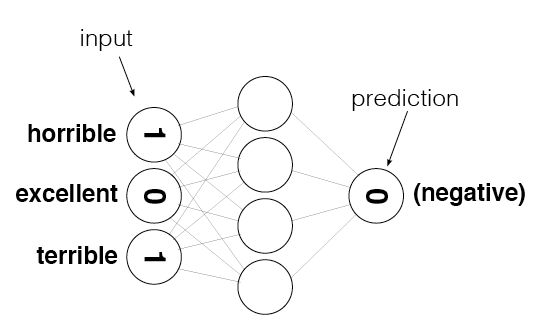

In [113]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [ ]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [ ]:
layer_0

In [ ]:
review_counter = Counter()

In [ ]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [ ]:
review_counter.most_common()

# Reducing Noise in Our Input Data

In [ ]:

    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                ## This is the change, New for Project 4: changed to set to 1 instead of add 1
                self.layer_0[0][self.word2index[word]] = 1

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

That should have trained much better than the earlier attempts. It's still not wonderful, but it should have improved dramatically. Run the following cell to test your model with 1000 predictions.

In [ ]:
mlp.test(reviews[-1000:],labels[-1000:])

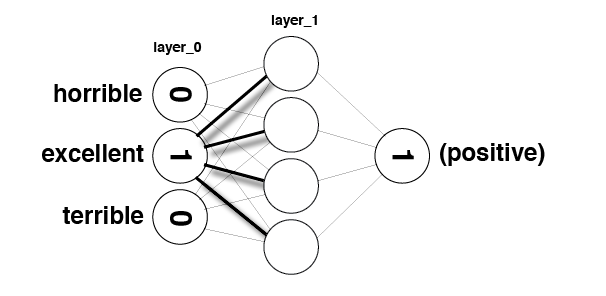

In [114]:
Image(filename='sentiment_network_sparse.png')

In [115]:
layer_0 = np.zeros(10)

In [116]:
layer_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [117]:
layer_0[4] = 1
layer_0[9] = 1

In [118]:
layer_0

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [119]:
weights_0_1 = np.random.randn(10,5)

In [120]:
layer_0.dot(weights_0_1)

array([ 2.40385671, -2.03143821, -1.01001659, -0.20106613,  2.10673993])

In [121]:
indices = [4,9]

In [122]:
layer_1 = np.zeros(5)

In [123]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [124]:
layer_1

array([ 2.40385671, -2.03143821, -1.01001659, -0.20106613,  2.10673993])

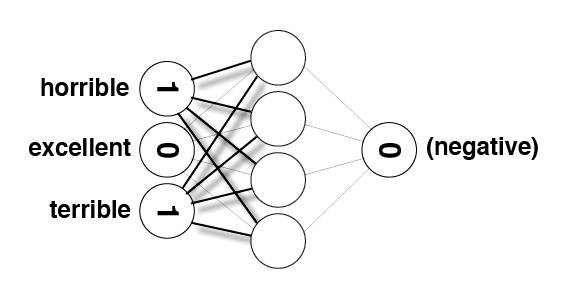

In [125]:
Image(filename='sentiment_network_sparse_2.png')